# Upper Confidence Bound BO


In [10]:
# Import the class
import torch
import yaml

## Customizing the UpperConfidenceBound Generator
First lets examine the possible options that we can specify for the
UpperConfidenceBound generator. We can use these keys to customize optimization.

In [11]:
from xopt.utils import get_generator_and_defaults
ucb_gen, ucb_options = get_generator_and_defaults("upper_confidence_bound")
print(yaml.dump(ucb_options.dict()))

acq:
  beta: 2.0
  monte_carlo_samples: 128
  proximal_lengthscales: null
  use_transformed_proximal_weights: true
model:
  use_conservative_prior_lengthscale: false
  use_conservative_prior_mean: false
  use_low_noise_prior: false
n_initial: 3
optim:
  num_restarts: 5
  raw_samples: 20
  sequential: true
  use_nearby_initial_points: true



In [12]:
from xopt.resources.test_functions.rosenbrock import make_rosenbrock_vocs, evaluate_rosenbrock
from xopt import Xopt, Evaluator
import pandas as pd

vocs = make_rosenbrock_vocs(2)

generator_options = ucb_gen.default_options()
generator_options.optim.num_restarts = 20
generator_options.acq.beta = 2.0
generator_options.model.use_low_noise_prior = True
#generator_options.acq.proximal_lengthscales = [0.1, 0.1]

evaluator = Evaluator(function=evaluate_rosenbrock)
generator = ucb_gen(vocs, generator_options)


C:\Users\Ryan Roussel\AppData\Local\Temp\ipykernel_12504\638764772.py:13: DeprecationWarning: `copy_on_model_validation` should be a string: 'deep', 'shallow' or 'none'
  evaluator = Evaluator(function=evaluate_rosenbrock)


In [13]:
X = Xopt(generator=generator, evaluator=evaluator, vocs=vocs)

for i in range(100):
    X.step()
    print(f"step {i}: best: {X.data['y'].min()}")


step 0: best: 24.94166016471266
step 1: best: 24.94166016471266
step 2: best: 24.94166016471266
step 3: best: 24.94166016471266
step 4: best: 24.94166016471266
step 5: best: 24.94166016471266
step 6: best: 8.321995252824381
step 7: best: 8.321995252824381
step 8: best: 8.321995252824381
step 9: best: 1.5448045131076686
step 10: best: 1.5448045131076686
step 11: best: 1.5448045131076686
step 12: best: 1.5448045131076686
step 13: best: 1.5448045131076686
step 14: best: 1.5448045131076686
step 15: best: 0.8801910596641158
step 16: best: 0.22467490323862174
step 17: best: 0.22467490323862174
step 18: best: 0.22467490323862174
step 19: best: 0.22467490323862174
step 20: best: 0.22467490323862174
step 21: best: 0.22467490323862174
step 22: best: 0.22467490323862174
step 23: best: 0.1311759704032181
step 24: best: 0.1311759704032181
step 25: best: 0.1311759704032181
step 26: best: 0.1311759704032181
step 27: best: 0.08440051805384087
step 28: best: 0.08440051805384087
step 29: best: 0.0844005

## View output data

In [14]:
X.data

,x0,x1,y,xopt_error,xopt_error_str
1,1.994073,-0.153015,1706.134734,False,
2,-0.554621,-0.166999,24.941660,False,
3,1.782443,1.941660,153.244229,False,
4,-0.585938,1.712380,189.946748,False,
5,-2.000000,0.206728,1447.891096,False,
...,...,...,...,...,...
98,0.779306,0.643115,0.176851,False,
99,0.406752,0.146870,0.386455,False,
100,0.238723,0.058720,0.579842,False,
101,0.536898,0.286221,0.214879,False,


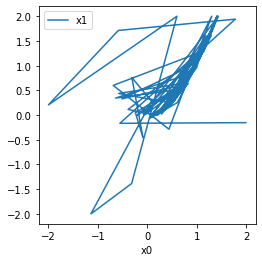

In [15]:
# plot results
ax = X.data.plot(*vocs.variable_names)
ax.set_aspect("equal")

## Visualize model used by upper confidence bound
Models are kept in a list, in this case that list has one element, the model
created for the objective `y1`.


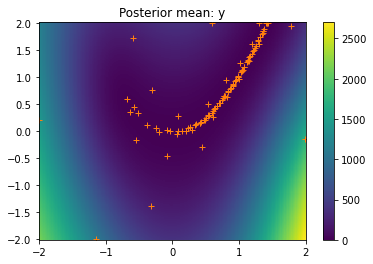

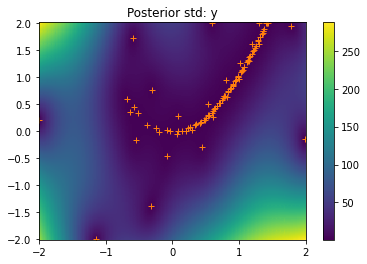

In [16]:
from matplotlib import pyplot as plt  # plot model predictions

data = X.data

bounds = generator.vocs.bounds
model = generator.train_model(generator.data)

# create mesh
n = 200
x = torch.linspace(*bounds.T[0], n)
y = torch.linspace(*bounds.T[1], n)
xx, yy = torch.meshgrid(x, y)
pts = torch.hstack([ele.reshape(-1, 1) for ele in (xx, yy)]).double()

outputs = generator.vocs.output_names
with torch.no_grad():
    post = model.posterior(pts)

    mean = post.mean
    std = torch.sqrt(post.variance)

    fig, ax = plt.subplots()
    ax.plot(*data[vocs.variable_names].to_numpy().T, "+C1")
    c = ax.pcolor(xx, yy, mean.reshape(n, n))
    fig.colorbar(c)
    ax.set_title(f"Posterior mean: {outputs[0]}")

    fig2, ax2 = plt.subplots()
    ax2.plot(*data[vocs.variable_names].to_numpy().T, "+C1")
    c = ax2.pcolor(xx, yy, std.reshape(n, n))
    fig2.colorbar(c)
    ax2.set_title(f"Posterior std: {outputs[0]}")

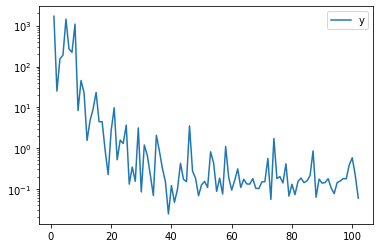

In [17]:
ax = X.data.plot(y="y", logy=True)

In [18]:
# Cleanup
!rm dump.yaml

'rm' is not recognized as an internal or external command,
operable program or batch file.
